In [2]:
import pandas as pd
import numpy as np

In [3]:
# Load the dataset
# Display the first few rows of the dataset
df = pd.read_csv('./cancer_database.csv')
df.head()

,title,length,id,type,tissue,subTypes,oncoTreeLevel,mainType,parentOncoTreeId,oncoTreeId,...,github,vimeo_followers,vimeo,telegram_followers,telegram,rumble_followers,rumble,gab_followers,gab,coursera
0,Jonsson Comprehensive Cancer Center,22,jonsson-comprehensive-cancer-center,nciCancerCenter,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Skin Cancer,28,skin,cancerType,Skin,29.0,1.0,"Skin Cancer, NOS",TISSUE,SKIN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bladder Cancer,26,bladder-cancer,cancerType,Bladder/Urinary Tract,17.0,1.0,"Bladder/Urinary Tract Cancer, NOS",TISSUE,BLADDER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Breast Cancer,26,breast,cancerType,Breast,35.0,1.0,"Breast Cancer, NOS",TISSUE,BREAST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Lung Cancer,26,lung,cancerType,Lung,29.0,1.0,"Lung Cancer, NOS",TISSUE,LUNG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Get the summary of the data
data_summary = {
    "Number of Rows": df.shape[0],
    "Number of Columns": df.shape[1],
    "Missing Values": df.isnull().sum().sum(),
    "Data Types": df.dtypes.value_counts().to_dict()
}

data_summary

{'Number of Rows': 1453,
 'Number of Columns': 96,
 'Missing Values': 123985,
 'Data Types': {dtype('O'): 75, dtype('float64'): 20, dtype('int64'): 1}}

In [5]:
numerical_summary = df.describe().transpose()
numerical_summary

,count,mean,std,min,25%,50%,75%,max
length,1453.0,1.104474e+01,3.132089e+00,3.0,1.000000e+01,12.0,1.200000e+01,28.0
subTypes,854.0,2.152225e+00,1.001922e+01,0.0,0.000000e+00,0.0,0.000000e+00,120.0
oncoTreeLevel,854.0,3.152225e+00,1.144952e+00,1.0,2.000000e+00,3.0,4.000000e+00,6.0
appeared,130.0,1.983162e+03,3.816220e+01,1771.0,1.967250e+03,1990.5,2.011000e+03,2023.0
pubChem,87.0,2.631455e+06,8.061799e+06,1071.0,5.352500e+03,60838.0,4.529610e+05,54670067.0
domainName_registered,74.0,2.002257e+03,8.142668e+00,1988.0,1.996000e+03,1999.0,2.009750e+03,2020.0
twitter_followers,62.0,2.081537e+05,7.543082e+05,3.0,4.690000e+03,14150.0,7.572500e+04,5400000.0
usNewsRank,46.0,2.352174e+01,1.364264e+01,1.0,1.225000e+01,23.5,3.450000e+01,48.0
facebook_followers,26.0,1.874490e+05,5.607620e+05,110.0,3.025000e+03,9800.0,7.167625e+04,2700000.0
uscsCasesPerYear,25.0,6.421740e+04,7.276540e+04,54.0,1.887200e+04,45272.0,7.156500e+04,264115.0


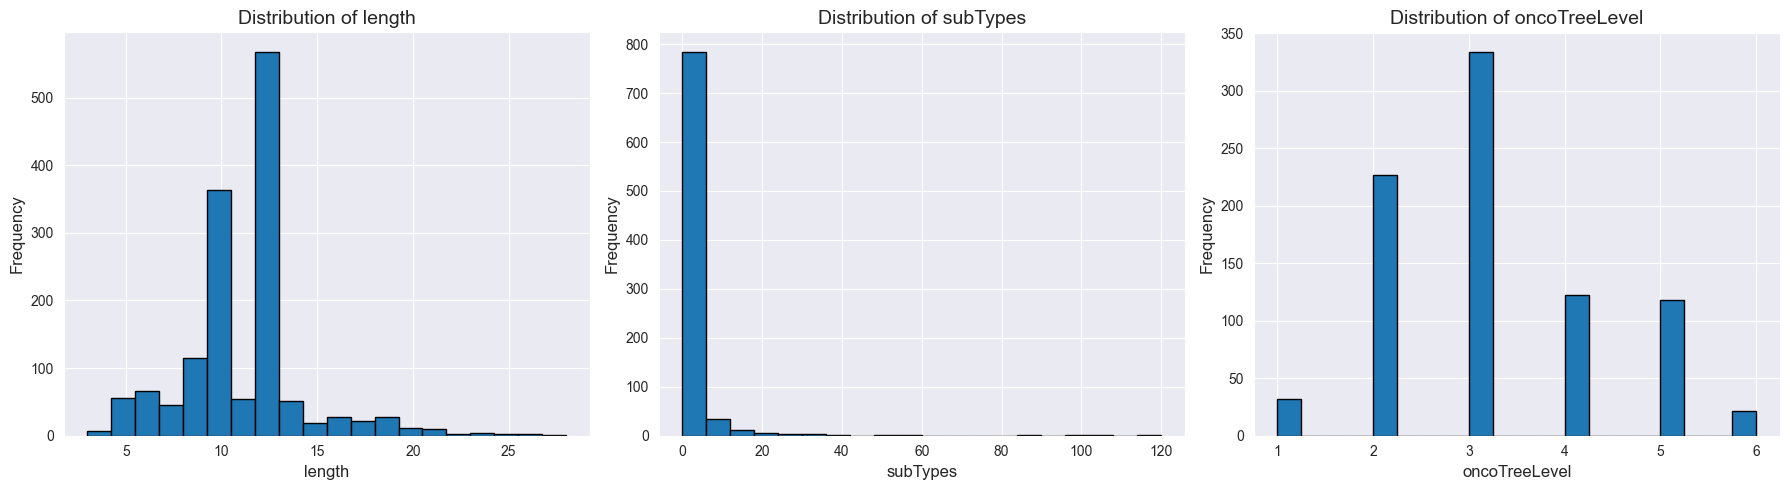

In [6]:
import matplotlib.pyplot as plt

# Define a list of numerical columns to plot histograms
numerical_columns = ['length', 'subTypes', 'oncoTreeLevel']

# Create histograms for the numerical columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(numerical_columns):
    df[col].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

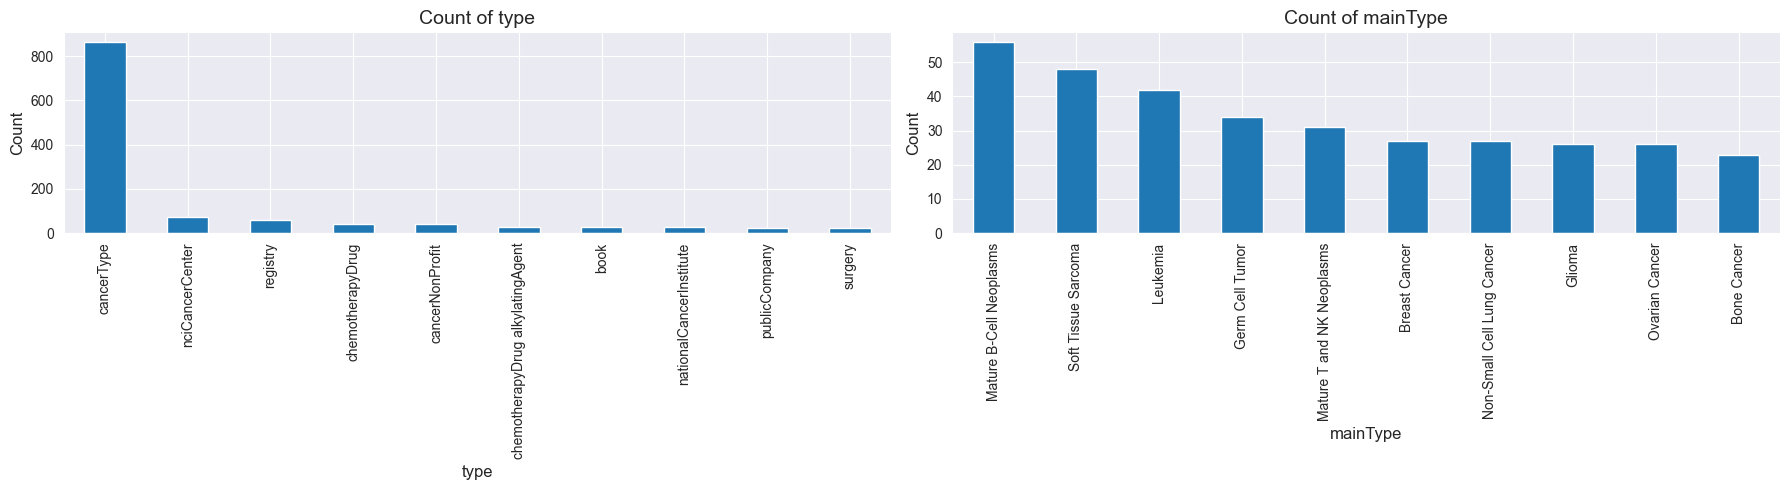

In [7]:
# Define a list of categorical columns to plot bar charts
categorical_columns = ['type', 'mainType']

# Create bar charts for the categorical columns
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

for i, col in enumerate(categorical_columns):
    df[col].value_counts().head(10).plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Count of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

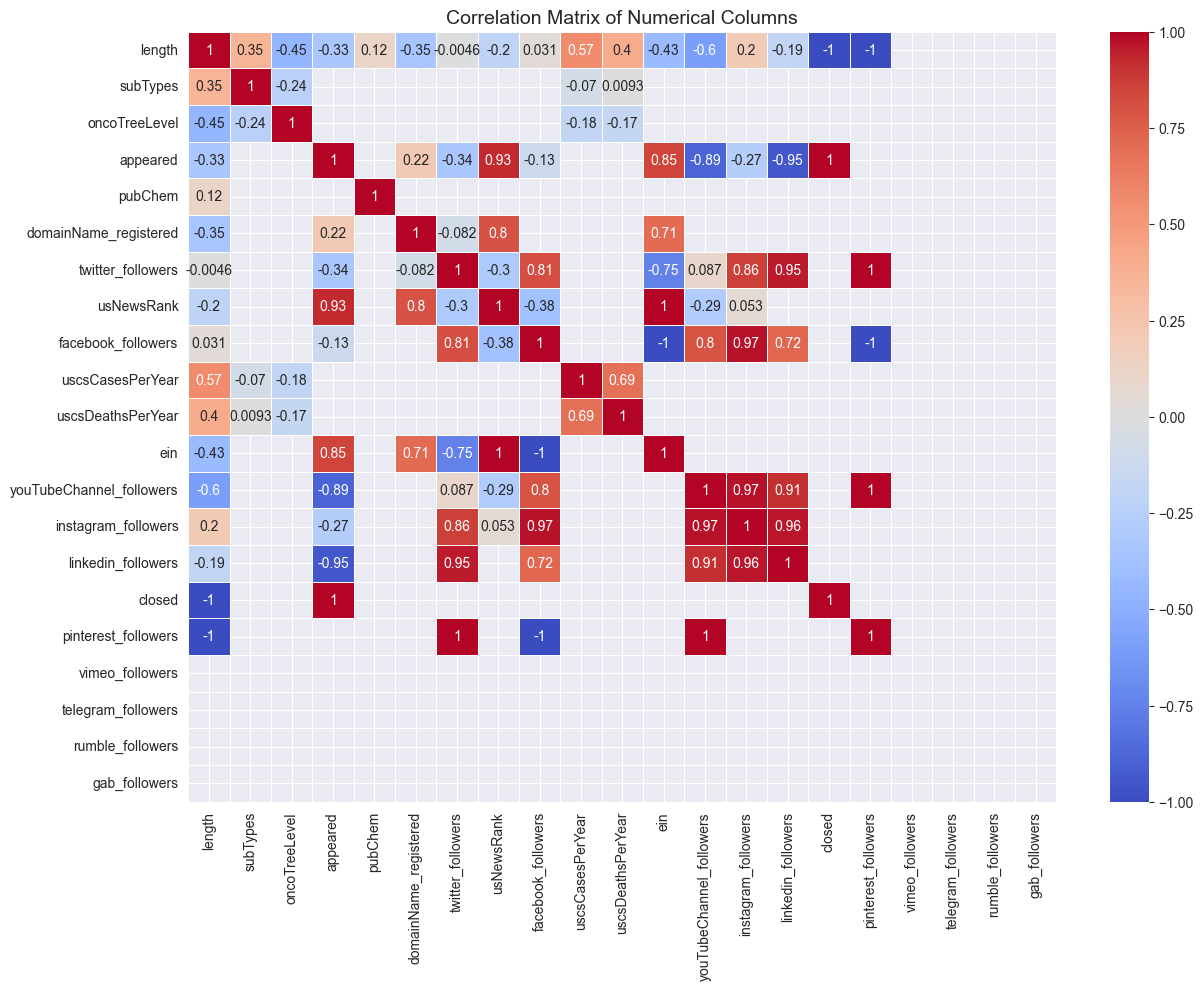

In [8]:
import seaborn as sns

# Create a correlation matrix
numerical_data = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()

# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Columns', fontsize=14)
plt.show()